In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 10.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")

In [ ]:
df['class']

0      P
1      P
2      P
3      P
4      P
      ..
169    H
170    H
171    H
172    H
173    H
Name: class, Length: 174, dtype: object

In [ ]:
X = df.drop(columns=["class"])
y = df["class"]

In [ ]:

object_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in object_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

In [ ]:
X[col]

0        0
1       86
2       97
3      108
4      119
      ... 
169     79
170     80
171     81
172     82
173     83
Name: ID, Length: 174, dtype: int64

In [ ]:
X.columns

Index(['ID', 'air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1',
       ...
       'mean_gmrt25', 'mean_jerk_in_air25', 'mean_jerk_on_paper25',
       'mean_speed_in_air25', 'mean_speed_on_paper25', 'num_of_pendown25',
       'paper_time25', 'pressure_mean25', 'pressure_var25', 'total_time25'],
      dtype='object', length=451)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='air_time1', y='disp_index1', z='gmrt_in_air1', color='class', opacity=0.7)
fig.update_layout(title='3D Scatter Plot of air_time1, disp_index1, and gmrt_in_air1')
fig.show()

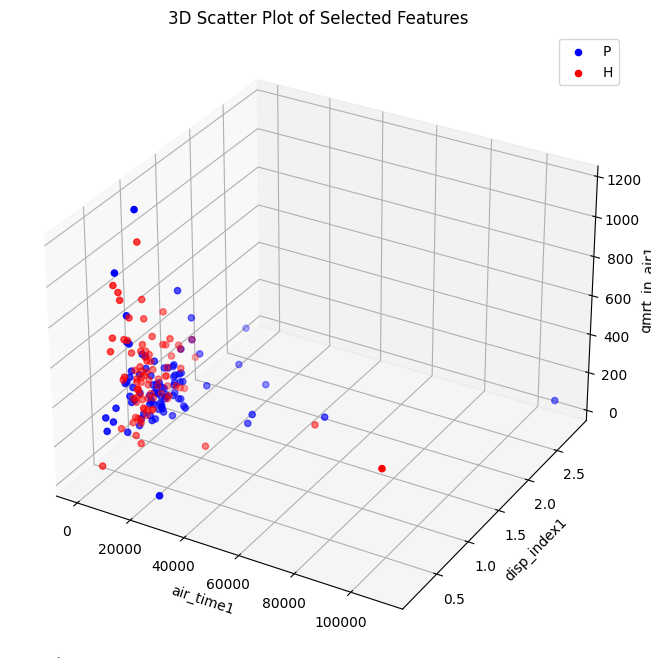

In [ ]:

feature1 = 'air_time1'
feature2 = 'disp_index1'
feature3 = 'gmrt_in_air1'


class_color_map = {'P': 'blue', 'H': 'red'}


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


for cls in df['class'].unique():
    ax.scatter(df[df['class'] == cls][feature1],
               df[df['class'] == cls][feature2],
               df[df['class'] == cls][feature3],
               c=class_color_map[cls],
               label=cls)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('3D Scatter Plot of Selected Features')


ax.legend()

plt.show()

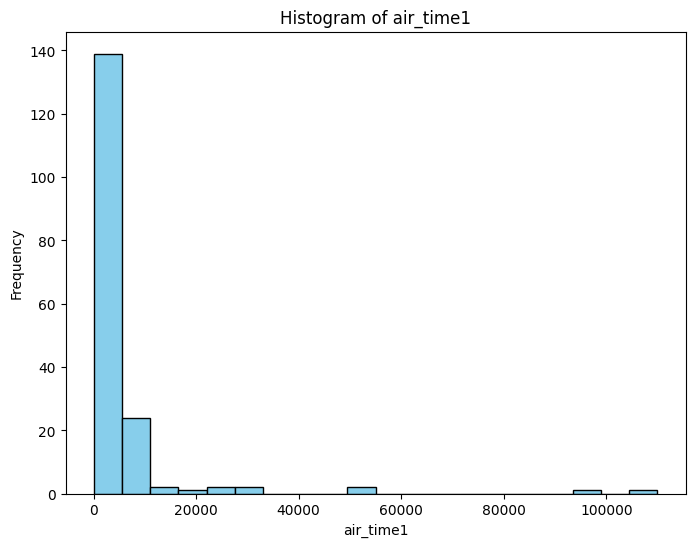

In [ ]:

plt.figure(figsize=(8, 6))
plt.hist(df['air_time1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of air_time1')
plt.xlabel('air_time1')
plt.ylabel('Frequency')
plt.show()

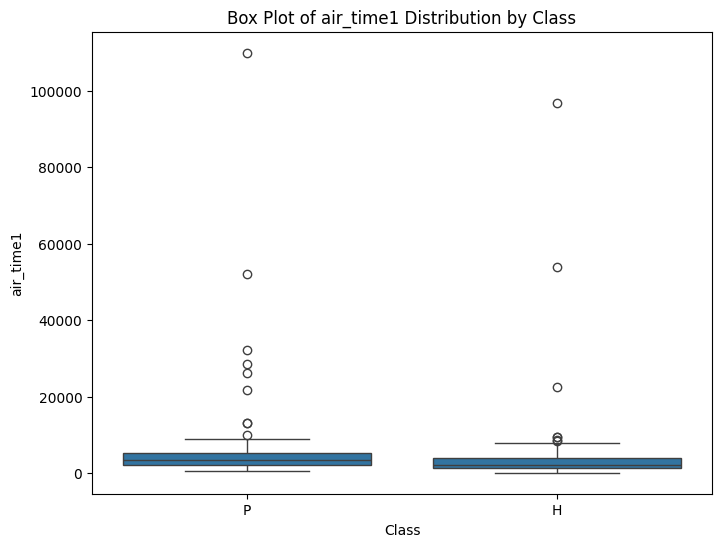

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='air_time1', data=df)
plt.title('Box Plot of air_time1 Distribution by Class')
plt.xlabel('Class')
plt.ylabel('air_time1')
plt.show()

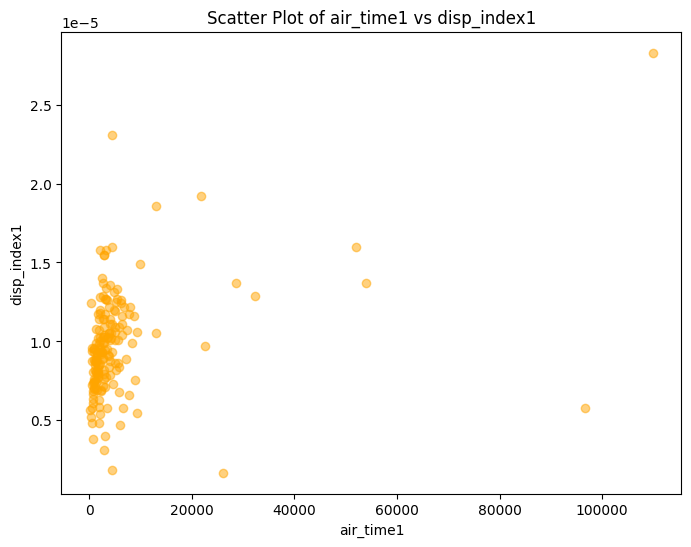

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['air_time1'], df['disp_index1'], color='orange', alpha=0.5)
plt.title('Scatter Plot of air_time1 vs disp_index1')
plt.xlabel('air_time1')
plt.ylabel('disp_index1')
plt.show()

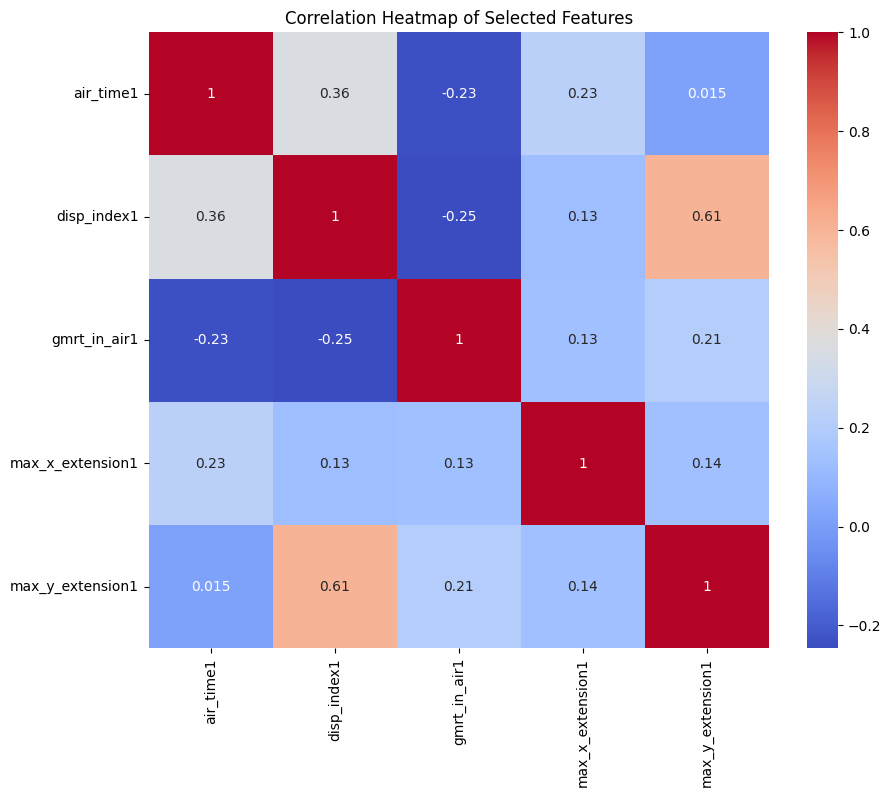

In [ ]:

subset_features = df[['air_time1', 'disp_index1', 'gmrt_in_air1', 'max_x_extension1', 'max_y_extension1']]
correlation_matrix = subset_features.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

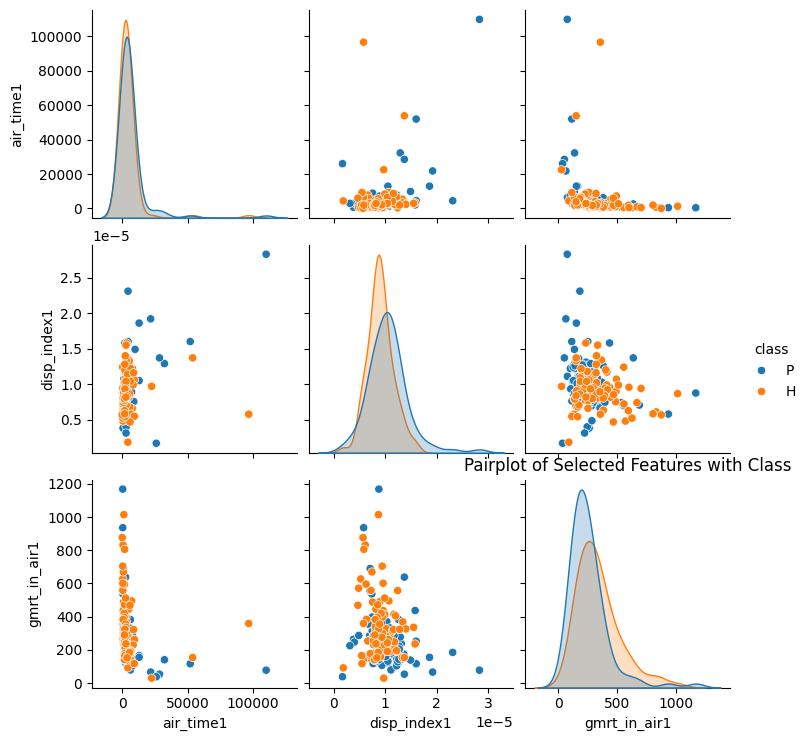

In [ ]:
sns.pairplot(df[['air_time1', 'disp_index1', 'gmrt_in_air1', 'class']], hue='class')
plt.title('Pairplot of Selected Features with Class')
plt.show()

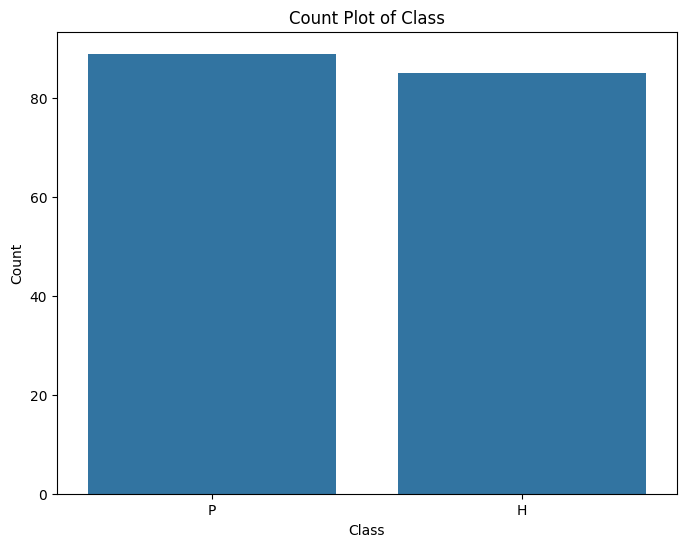

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Count Plot of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
object_columns_list = list(object_columns)

In [ ]:

c

0:	learn: 0.6204616	total: 111ms	remaining: 11s
10:	learn: 0.2448372	total: 580ms	remaining: 4.69s
20:	learn: 0.1224281	total: 1.04s	remaining: 3.9s
30:	learn: 0.0700948	total: 1.69s	remaining: 3.75s
40:	learn: 0.0485521	total: 2.56s	remaining: 3.69s
50:	learn: 0.0333518	total: 3.4s	remaining: 3.27s
60:	learn: 0.0246535	total: 4.29s	remaining: 2.74s
70:	learn: 0.0182388	total: 4.83s	remaining: 1.98s
80:	learn: 0.0134577	total: 5.29s	remaining: 1.24s
90:	learn: 0.0107237	total: 5.79s	remaining: 573ms
99:	learn: 0.0090055	total: 6.2s	remaining: 0us


In [ ]:
y_pred_cat = catboost_model.predict(X_test)

In [ ]:
accuracy_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat, average='weighted')
recall_cat = recall_score(y_test, y_pred_cat, average='weighted')
f1_cat = f1_score(y_test, y_pred_cat, average='weighted')
class_report_cat = classification_report(y_test, y_pred_cat)

In [ ]:
print("CatBoost:")
print("Accuracy:", accuracy_cat)
print("Precision:", precision_cat)
print("Recall:", recall_cat)
print("F1-score:", f1_cat)
print("Classification Report:")
print(class_report_cat)

CatBoost:
Accuracy: 0.9142857142857143
Precision: 0.9285714285714286
Recall: 0.9142857142857143
F1-score: 0.9147069147069147
Classification Report:
              precision    recall  f1-score   support

           H       0.83      1.00      0.91        15
           P       1.00      0.85      0.92        20

    accuracy                           0.91        35
   macro avg       0.92      0.93      0.91        35
weighted avg       0.93      0.91      0.91        35



In [ ]:

lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 69, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19769
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 451
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496403 -> initscore=-0.014389
[LightGBM] [Info] Start training from score -0.014389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(random_state=42)

In [ ]:
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')
class_report_lgb = classification_report(y_test, y_pred_lgb)

In [ ]:
y_pred_lgb

array(['H', 'H', 'H', 'H', 'H', 'H', 'P', 'P', 'H', 'P', 'H', 'P', 'P',
       'P', 'P', 'P', 'H', 'P', 'P', 'H', 'H', 'H', 'H', 'P', 'P', 'P',
       'H', 'P', 'H', 'P', 'P', 'P', 'P', 'P', 'H'], dtype=object)

In [ ]:
print("\nLightGBM:")
print("Accuracy:", accuracy_lgb)
print("Precision:", precision_lgb)
print("Recall:", recall_lgb)
print("F1-score:", f1_lgb)
print("Classification Report:")
print(class_report_lgb)


LightGBM:
Accuracy: 0.9714285714285714
Precision: 0.9732142857142857
Recall: 0.9714285714285714
F1-score: 0.9715231005553586
Classification Report:
              precision    recall  f1-score   support

           H       0.94      1.00      0.97        15
           P       1.00      0.95      0.97        20

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_boost.fit(X_train_scaled, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_boost.fit(X_train_scaled, y_train)
y_pred_ada = ada_boost.predict(X_test_scaled)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')
class_report_ada = classification_report(y_test, y_pred_ada)


In [ ]:
print("\nAdaBoost:")
print("Accuracy:", accuracy_ada)
print("Precision:", precision_ada)
print("Recall:", recall_ada)
print("F1-score:", f1_ada)
print("Classification Report:")
print(class_report_ada)


AdaBoost:
Accuracy: 0.9428571428571428
Precision: 0.9428571428571428
Recall: 0.9428571428571428
F1-score: 0.9428571428571428
Classification Report:
              precision    recall  f1-score   support

           H       0.93      0.93      0.93        15
           P       0.95      0.95      0.95        20

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35



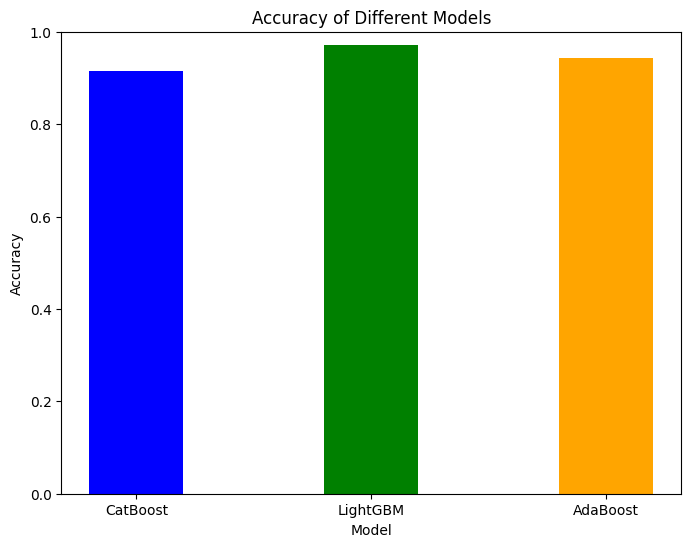

In [ ]:
models = ['CatBoost', 'LightGBM', 'AdaBoost']
accuracies = [accuracy_cat,accuracy_lgb, accuracy_ada]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'],width=0.4)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

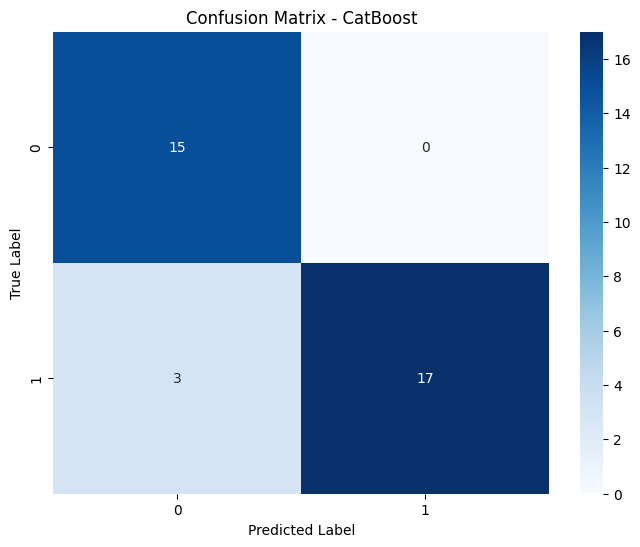

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CatBoost')
plt.show()

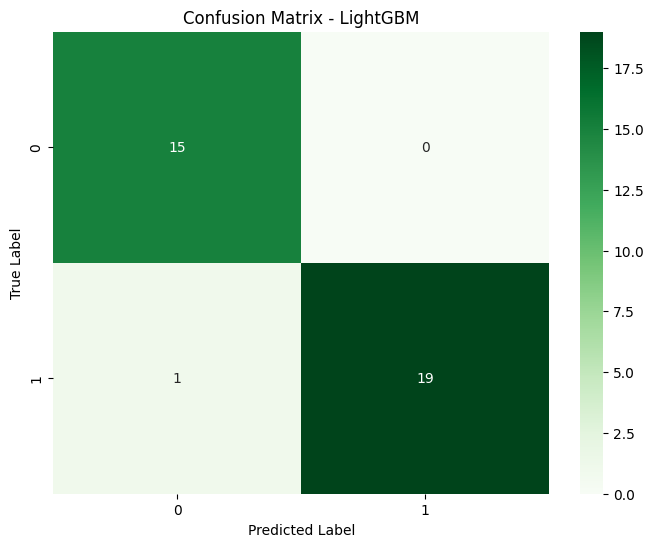

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()

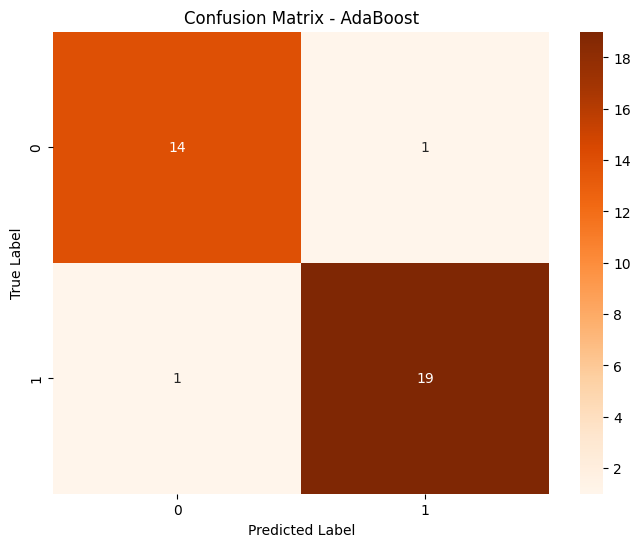

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Oranges', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

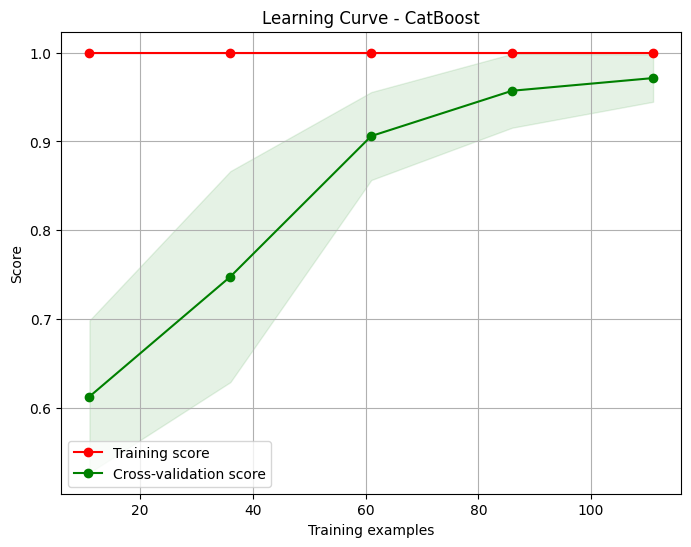

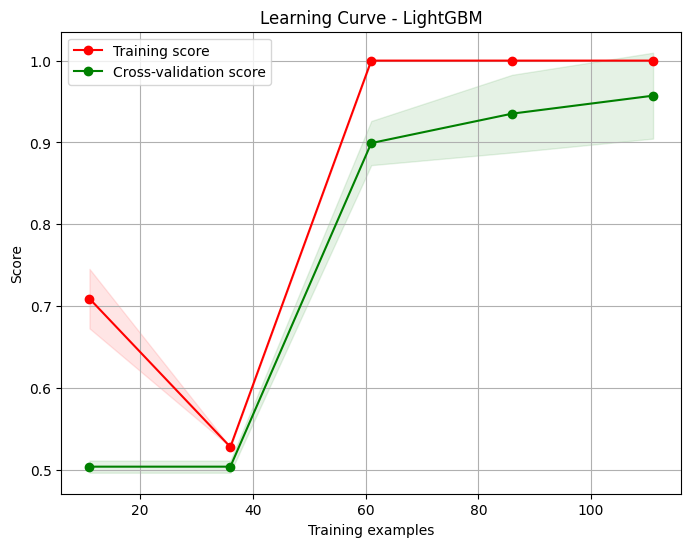

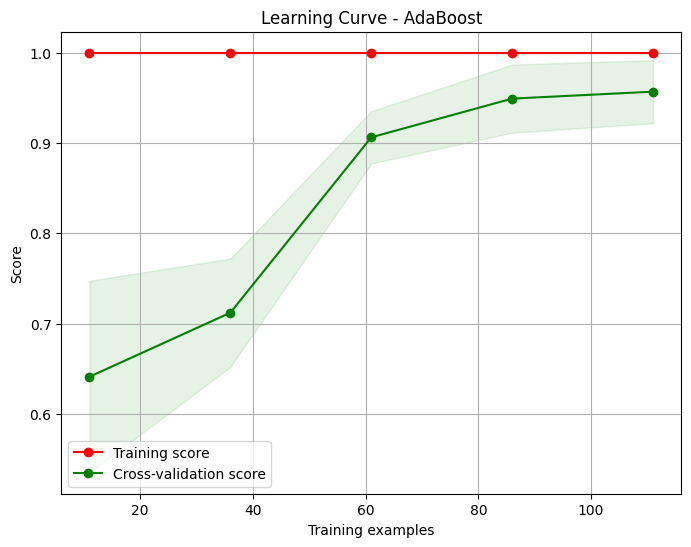

In [ ]:



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(catboost_model, "Learning Curve - CatBoost", X_train, y_train, cv=5)
plt.show()

plot_learning_curve(lgb_model, "Learning Curve - LightGBM", X_train, y_train, cv=5)
plt.show()

plot_learning_curve(ada_boost, "Learning Curve - AdaBoost", X_train, y_train, cv=5)
plt.show()

In [ ]:
df.columns

Index(['ID', 'air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1',
       ...
       'mean_jerk_in_air25', 'mean_jerk_on_paper25', 'mean_speed_in_air25',
       'mean_speed_on_paper25', 'num_of_pendown25', 'paper_time25',
       'pressure_mean25', 'pressure_var25', 'total_time25', 'class'],
      dtype='object', length=452)